In [1]:
# author Frederik

# Namespaces
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

In [2]:
# Plotte indstillinger
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=16)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, top=True, direction="in")  # skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=16)
plt.rc("legend", fontsize=16)

# Importere data
df = pd.read_csv('StudentsPerformanceCleaned.csv')
print(df.head())

   Unnamed: 0  gender race/ethnicity               p_edu         lunch  \
0           0  female        group B   bachelor's degree      standard   
1           1  female        group C        some college      standard   
2           2  female        group B     master's degree      standard   
3           3    male        group A  associate's degree  free/reduced   
4           4    male        group C        some college      standard   

    testprep  math score  reading score  writing score  
0       none          72             72             74  
1  completed          69             90             88  
2       none          90             95             93  
3       none          47             57             44  
4       none          76             78             75  


In [3]:
# Definere funktioner
def calc_pop_mean(data=None, size=100, count=1000): # bootstrap
    means = []
    for i in range(count):
        means.append(np.random.choice(data, size=size, replace=True))
    return np.mean(means)

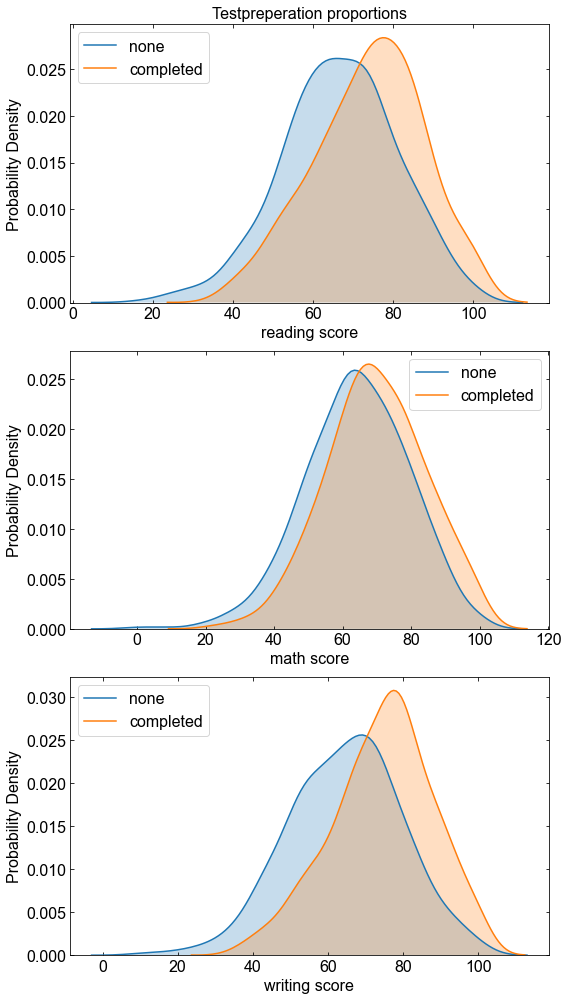

In [4]:
# Subplots
labels = ['reading score','math score','writing score']
fig, ax = plt.subplots(3, 1, figsize=(8,14))

# Plotte kde-plots
for i, l in enumerate(labels):
    sns.kdeplot(df[df.testprep == 'none'][l], shade=True, label='none', ax=ax[i])
    sns.kdeplot(df[df.testprep == 'completed'][l], shade=True, label='completed', ax=ax[i])
    ax[i].set_xlabel(l)
    ax[i].set_ylabel('Probability Density')
    ax[i].legend()

# Indstillinger for plot
ax[0].set_title('Testpreperation proportions')
plt.subplots_adjust(wspace=2)
plt.tight_layout()
sns.color_palette('pastel')
plt.show()

In [5]:
# One-Sample T-Tests
read_none = df[df.testprep == 'none']['reading score']
read_pop_mean = calc_pop_mean(read_none, size=1000, count=1000)
tstat, pval_r = ss.ttest_1samp(df['reading score'], read_pop_mean)

math_none = df[df.testprep == 'none']['math score']
math_pop_mean = calc_pop_mean(read_none, size=1000, count=1000)
tstat, pval_m = ss.ttest_1samp(df['math score'], math_pop_mean)

write_none = df[df.testprep == 'none']['writing score']
write_pop_mean = calc_pop_mean(write_none, size=1000, count=1000)
tstat, pval_w = ss.ttest_1samp(df['writing score'], write_pop_mean)

# Printing results from One-Sample T-Tests
sig_level = 0.05
print('-------------------------------------')
print('Reading Score: Forskel er ' + ('signifikant' if pval_r < sig_level else 'ikke signifikant'))
print('-------------------------------------')
print('Math Score: Forskel er ' + ('signifikant' if pval_m < sig_level else 'ikke signifikant'))
print('-------------------------------------')
print('Writing Score: Forskel er ' + ('signifikant' if pval_w < sig_level else 'ikke signifikant'))
print('-------------------------------------')

-------------------------------------
Reading Score: Forskel er signifikant
-------------------------------------
Math Score: Forskel er ikke signifikant
-------------------------------------
Writing Score: Forskel er signifikant
-------------------------------------


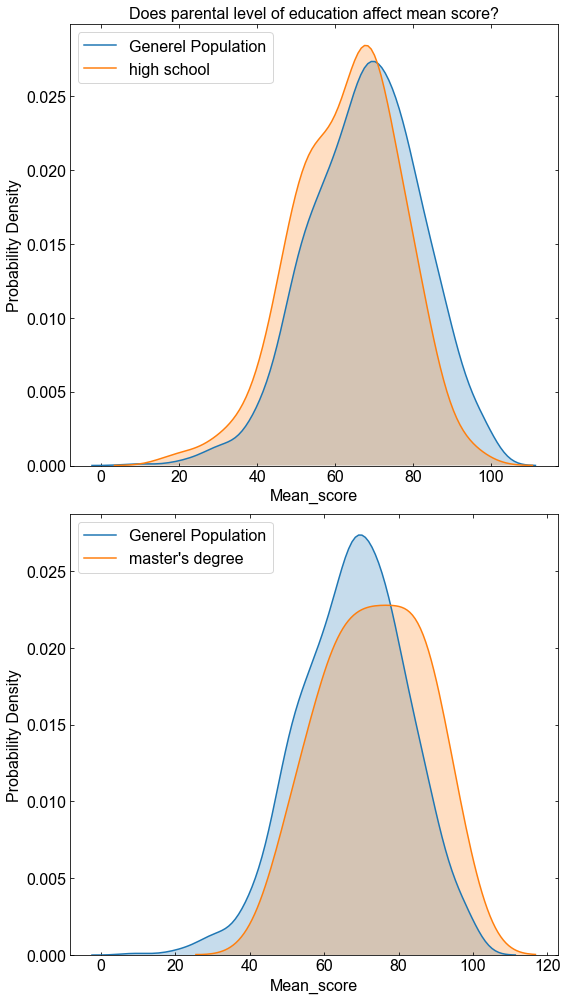

In [6]:
# Does parental level of education affect mean score?
df['mean_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

# Subplots 2
labels_2 = ['high school','master\'s degree']
fig2, ax2 = plt.subplots(2, 1, figsize=(8,14))

# Plotte kde-plots 2
for i, l in enumerate(labels_2):
    sns.kdeplot(df['mean_score'], shade=True, label='Generel Population', ax=ax2[i])
    sns.kdeplot(df[df.p_edu == l]['mean_score'], shade=True, label=l, ax=ax2[i])
    ax2[i].set_xlabel('Mean_score')
    ax2[i].set_ylabel('Probability Density')
    ax2[i].legend()

# Indstillinger for plot 2
ax2[0].set_title('Does parental level of education affect mean score?')
plt.subplots_adjust(wspace=2)
plt.tight_layout()
sns.color_palette('pastel')
plt.show()

In [7]:
# One-Sample T-Tests 2
gen_edu = df['mean_score']
gen_edu_pop_mean = calc_pop_mean(gen_edu, size=1000, count=1000)
tstat, pval_h = ss.ttest_1samp(df[df.p_edu == 'high school']['mean_score'], gen_edu_pop_mean)
tstat, pval_ma = ss.ttest_1samp(df[df.p_edu == 'master\'s degree']['mean_score'], gen_edu_pop_mean)

# Printing results from One-Sample T-Tests 2
sig_level_2 = 0.05
print('-------------------------------------')
print('Highschool: Forskel er ' + ('signifikant' if pval_h < sig_level_2 else 'ikke signifikant'))
print('-------------------------------------')
print('Master\'s degree: Forskel er ' + ('signifikant' if pval_ma < sig_level_2 else 'ikke signifikant'))
print('-------------------------------------')

-------------------------------------
Highschool: Forskel er signifikant
-------------------------------------
Master's degree: Forskel er signifikant
-------------------------------------


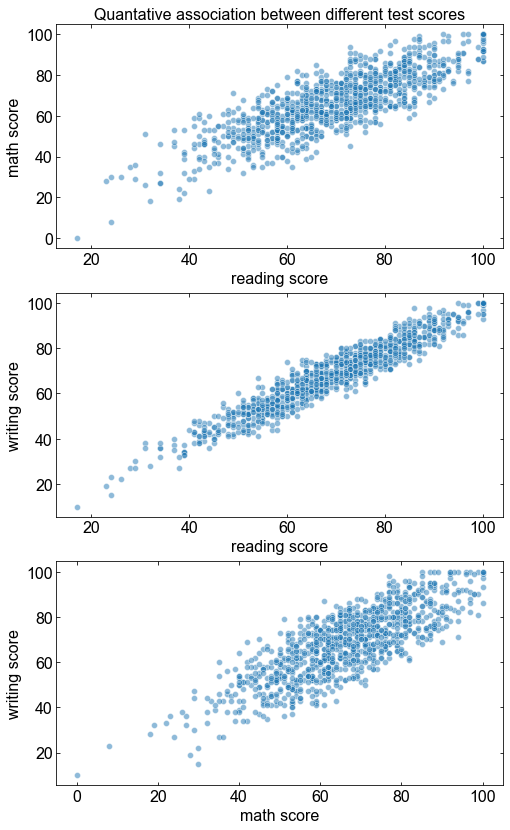

In [8]:
# Are mean scores for different categories associated?
# Subplots 3
labels_3 = ['reading score','math score','writing score']
fig3, ax3 = plt.subplots(3, 1, figsize=(8,14))

# Plotte scatter-plots
for i, l in enumerate(labels_3):
    if i == 0:
        sns.scatterplot(df[l], df[labels_3[i+1]],\
         palette = 'pastel', alpha = 0.5, ax=ax3[i])
        sns.scatterplot(df[l], df[labels_3[i+2]],\
         palette = 'pastel', alpha = 0.5, ax=ax3[i+1])
    elif i == 1:
        sns.scatterplot(df[l], df[labels_3[i+1]],\
         palette = 'pastel', alpha = 0.5, ax=ax3[i+1])
    else:
        None

# Indstillinger for plot 3  
ax3[0].set_title('Quantative association between different test scores')
plt.show()